In [1]:
def format_number(a, a1, a2):
    # get the effective digits of the minimum value of a1 and a2
    min_uncertainty = min(a1, a2)

    if 'e' in str(min_uncertainty):
        digit = -int(str(min_uncertainty).split('e')[1])
        a_new = a*10**digit
        a1_new = a1*10**digit
        a2_new = a2*10**digit
        return format_number(a_new, a1_new, a2_new)+' 10^{-%d}'%digit
    elif min_uncertainty < 1:
        # calculate the effective digits
        effective_digits = len(str(min_uncertainty).split('.')[1]) - len(str(int(str(min_uncertainty).split('.')[1]))) + 1
        # format the string
        formatted_a = "{:.{prec}f}".format(a, prec=effective_digits)
        formatted_a1 = "{:.{prec}f}".format(a1, prec=effective_digits)
        formatted_a2 = "{:.{prec}f}".format(a2, prec=effective_digits)
        # combine the final result
        formatted_str = f'{formatted_a}'+'^{+'+f'{formatted_a1}'+'}_{-'+f'{formatted_a2}'+'}'
    else:
        desired_precision = 10**int(np.log10(min_uncertainty))
        if int(min_uncertainty/desired_precision) == 1:
            effective_digits = 1
            formatted_a = "{:.{prec}f}".format(a, prec=effective_digits)
            formatted_a1 = "{:.{prec}f}".format(a1, prec=effective_digits)
            formatted_a2 = "{:.{prec}f}".format(a2, prec=effective_digits)
        else:
            formatted_a = str(int(round(a / desired_precision) * desired_precision))
            formatted_a1 = str(int(round(a1 / desired_precision) * desired_precision))
            formatted_a2 = str(int(round(a2 / desired_precision) * desired_precision))
        formatted_str = f'{formatted_a}'+'^{+'+f'{formatted_a1}'+'}_{-'+f'{formatted_a2}'+'}'
    return formatted_str

# Corner plot 

In [2]:
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import bilby
import corner
import csv
from glob import glob

import matplotlib.lines as mlines
from matplotlib.transforms import Bbox

In [3]:
duration_array = [5,12,24,36,49]


In [4]:
file_array_new_2d = [sorted(glob('outdir_inject_GW150914noise_version3.5_psd0.5_rwalk/*duration=%d_new*/*_SNR_result.json'%duration_array[nduration])) for nduration in [0,1,2,3,4]]
file_array_old_2d = [sorted(glob('outdir_inject_GW150914noise_version3.5_psd0.5_rwalk/*duration=%d_old*/*_SNR_result.json'%duration_array[nduration])) for nduration in [0,1,2,3,4]]

In [5]:
headers = ['names', 'log10width_median', 'log10width_plus', 'log10width_minus', 'amplitude_median', 'amplitude_plus', 'amplitude_minus', 'phase_median', 'phase_plus', 'phase_minus', 'spacing_median', 'spacing_plus', 'spacing_minus', 'res_phase0_median', 'res_phase0_plus', 'res_phase0_minus', 'fmin_median', 'fmin_plus', 'fmin_minus', 'fmax_median', 'fmax_plus', 'fmax_minus', 'duration_median', 'duration_plus', 'duration_minus', 'log_likelihood_median', 'log_likelihood_plus', 'log_likelihood_minus', 'log_prior_median', 'log_prior_plus', 'log_prior_minus', 'SNR_median', 'SNR_plus', 'SNR_minus']
keys_all = ['log_likelihood','spacing', 'width', 'phase', 'amplitude', 'fmin', 'fmax', 'res_phase0' , 'SNR']
with open('PE.csv', 'w') as f:
    f_csv = csv.writer(f)
    f_csv.writerow(headers)

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = True

plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

150 150
duration = 5


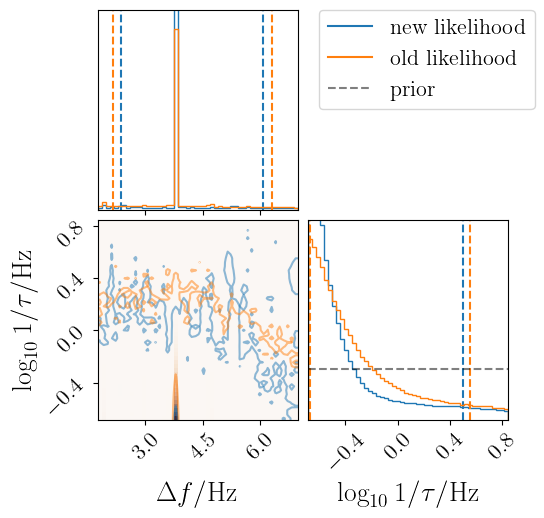

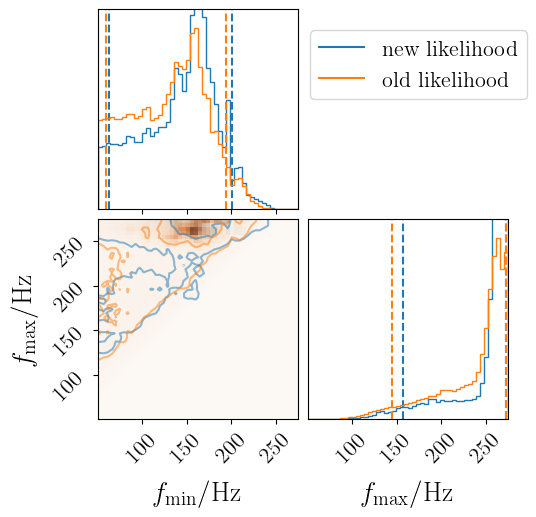

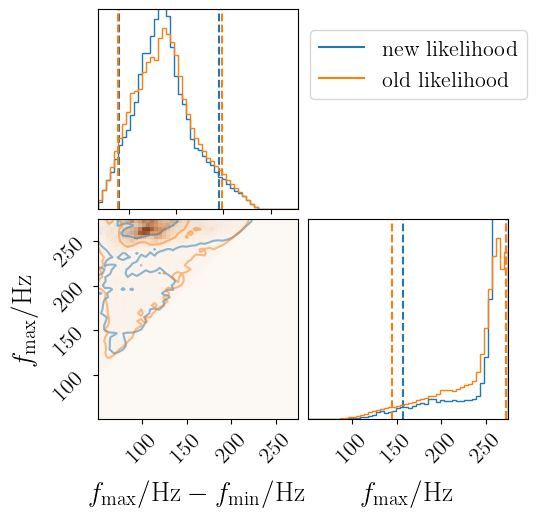

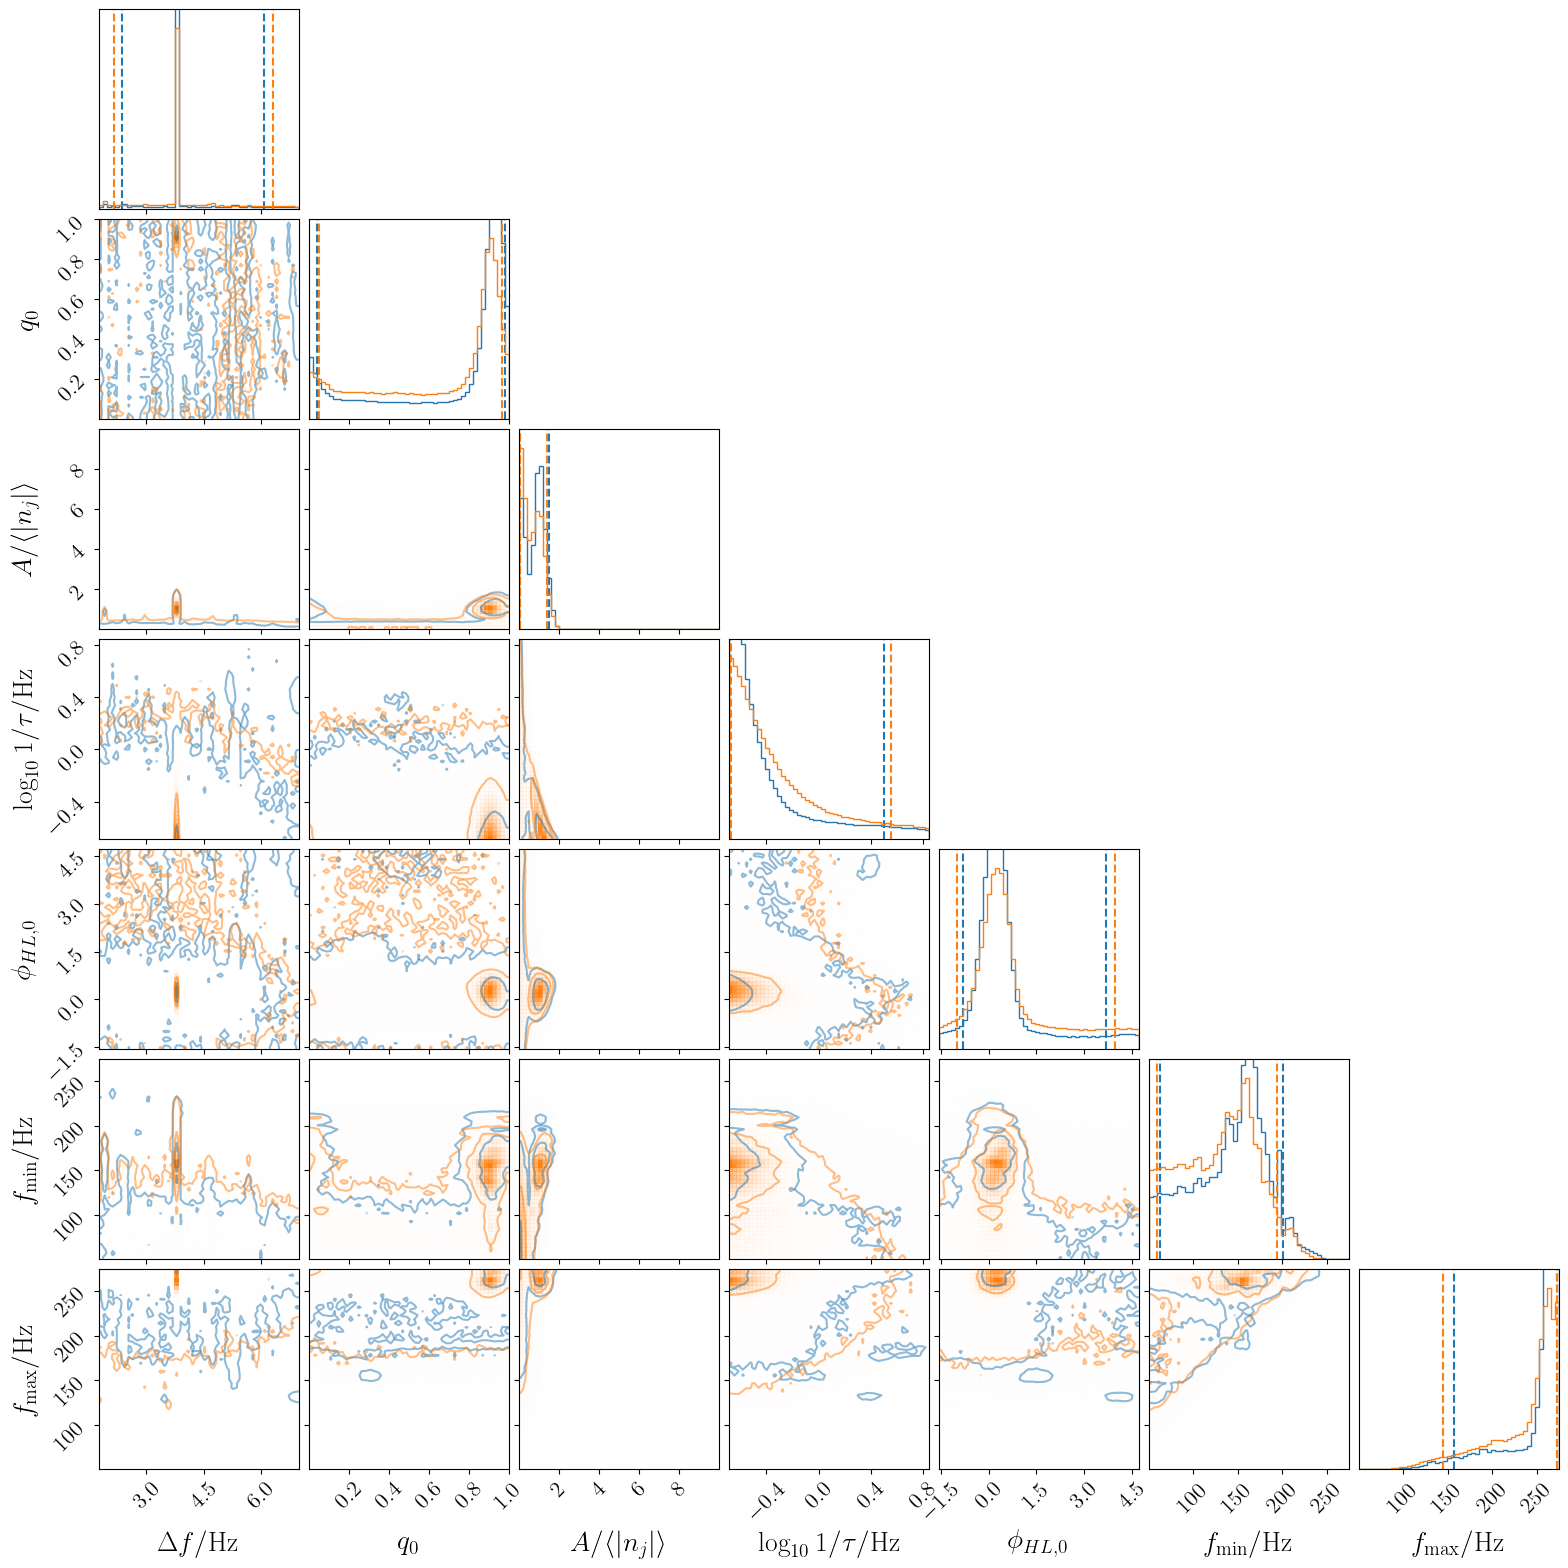

log_likelihood -1.8439484346655752 16.04952054659444 1.51349452847926
spacing 3.812809466298778 2.261341305112909 1.4475005160713303
width -0.5354732889858218 1.0371111165277438 0.14500760928453293
phase 0.8841000992709716 0.09564215171961632 0.8409001099224882
amplitude 0.8988348625987632 0.6064256607108116 0.820821813000854
fmin 148.82365284236926 51.799871912770556 86.23129427068372
fmax 260.19214722488726 12.940244049600665 103.11904578820082
res_phase0 0.26043154378472144 3.41555714935244 1.0613613425990391
SNR 8.564608986740696 3.4154137802851157 7.428078230468551
log_likelihood -2.7962106771619544 11.179861965931558 0.4123290398609667
spacing 3.8144040259607532 2.498591567958524 1.66930385437175
width -0.4127384001537635 0.9646539792359875 0.2560306554320799
phase 0.7919944681096335 0.17626030205810905 0.7395383226591297
amplitude 0.6645724298341558 0.7742465272112444 0.6085034413545192
fmin 134.17683385422083 60.08798891599943 75.17910646471947
fmax 252.0413480241147 20.2681700

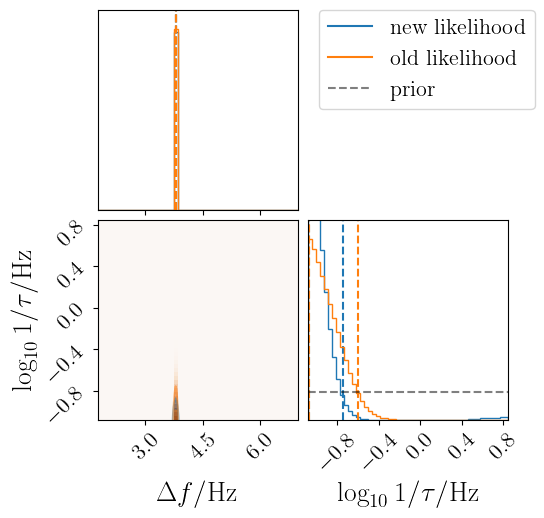

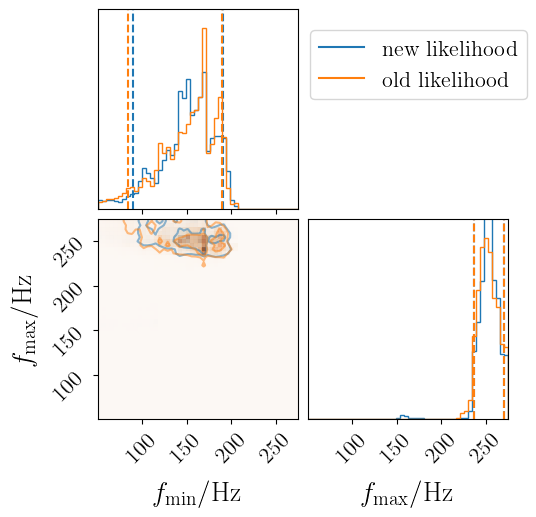

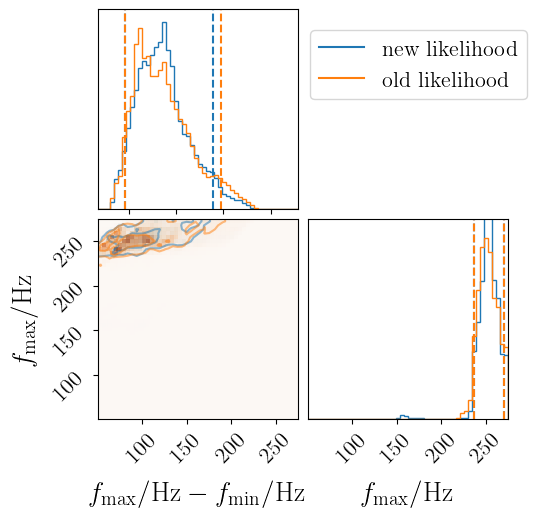

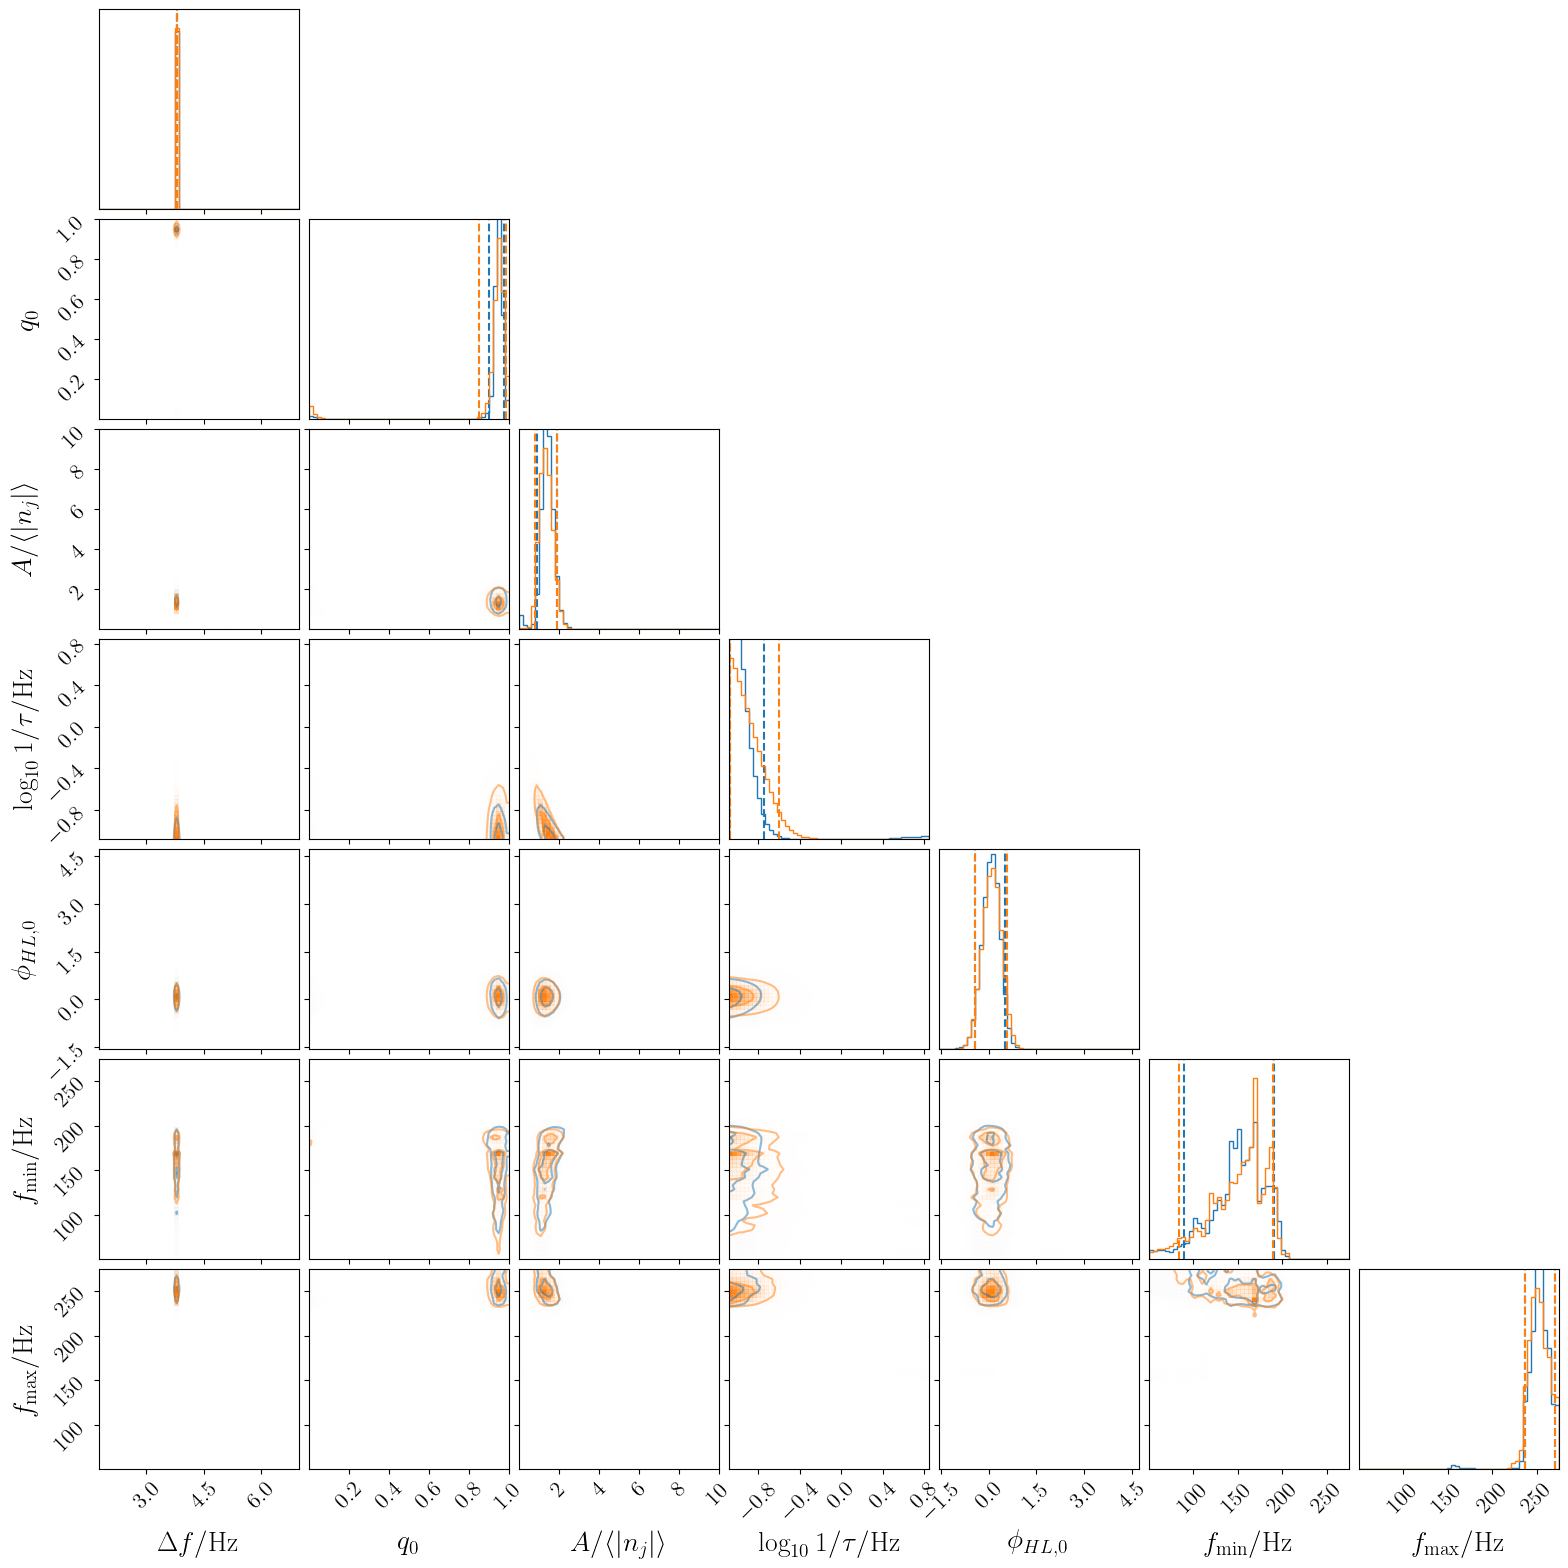

log_likelihood 21.017719791914125 15.061367474557635 13.245033270728928
spacing 3.8121587395164074 0.002456994759801212 0.002249539056263128
width -0.987776600863131 0.24907532720514236 0.08696375772360332
phase 0.9473589973341802 0.028824038854020517 0.045400521887014045
amplitude 1.4131520784042422 0.5335973137907664 0.4862884259893976
fmin 151.93392162539095 39.09471928145379 62.52273641037144
fmax 252.51290321798578 17.965977250740053 15.691382040460581
res_phase0 0.0672189684307225 0.4532794785494354 0.48987432156789096
SNR 11.956676448732484 2.3259900980621353 2.797598134236706
log_likelihood 12.544502662872265 15.721334892012464 10.54859005850844
spacing 3.8120520057951257 0.003370595717445024 0.0032917592120691452
width -0.9159140392720589 0.3225935022437614 0.15214688559660383
phase 0.9473645259251162 0.03717346607127847 0.09375604192623055
amplitude 1.3382562602349033 0.5908638931563226 0.49133320445946516
fmin 155.87026596626606 33.95104411777686 72.04313661549885
fmax 251.4

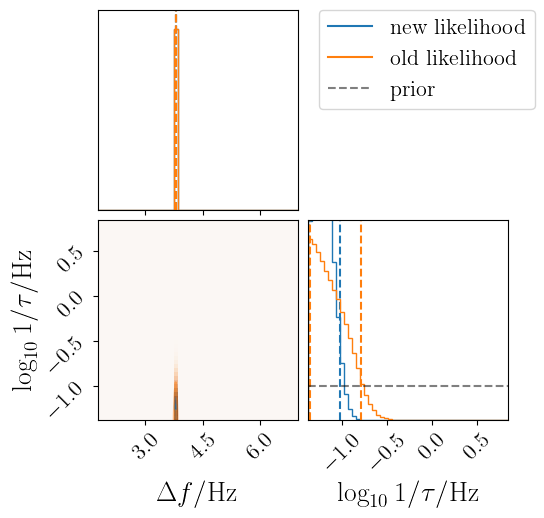

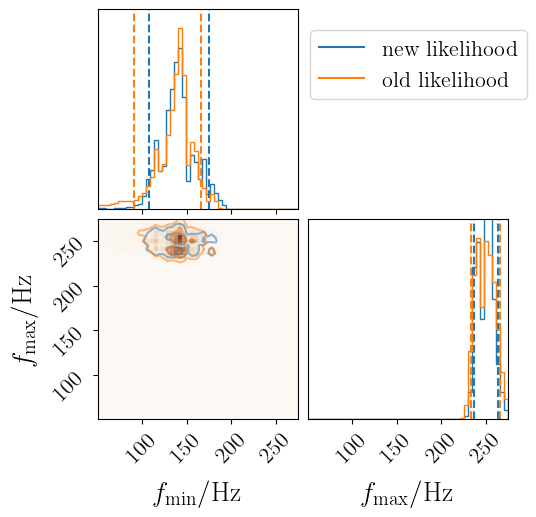

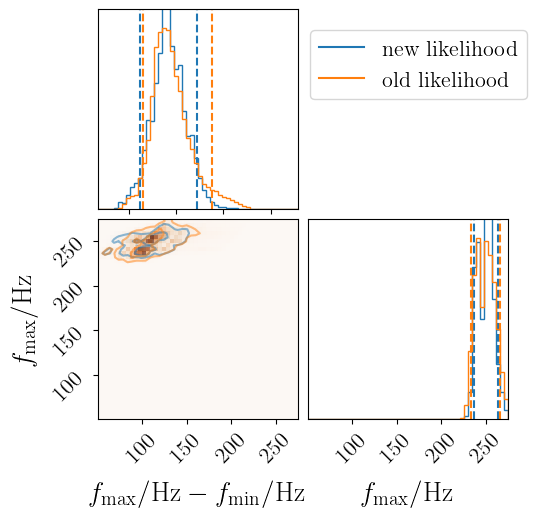

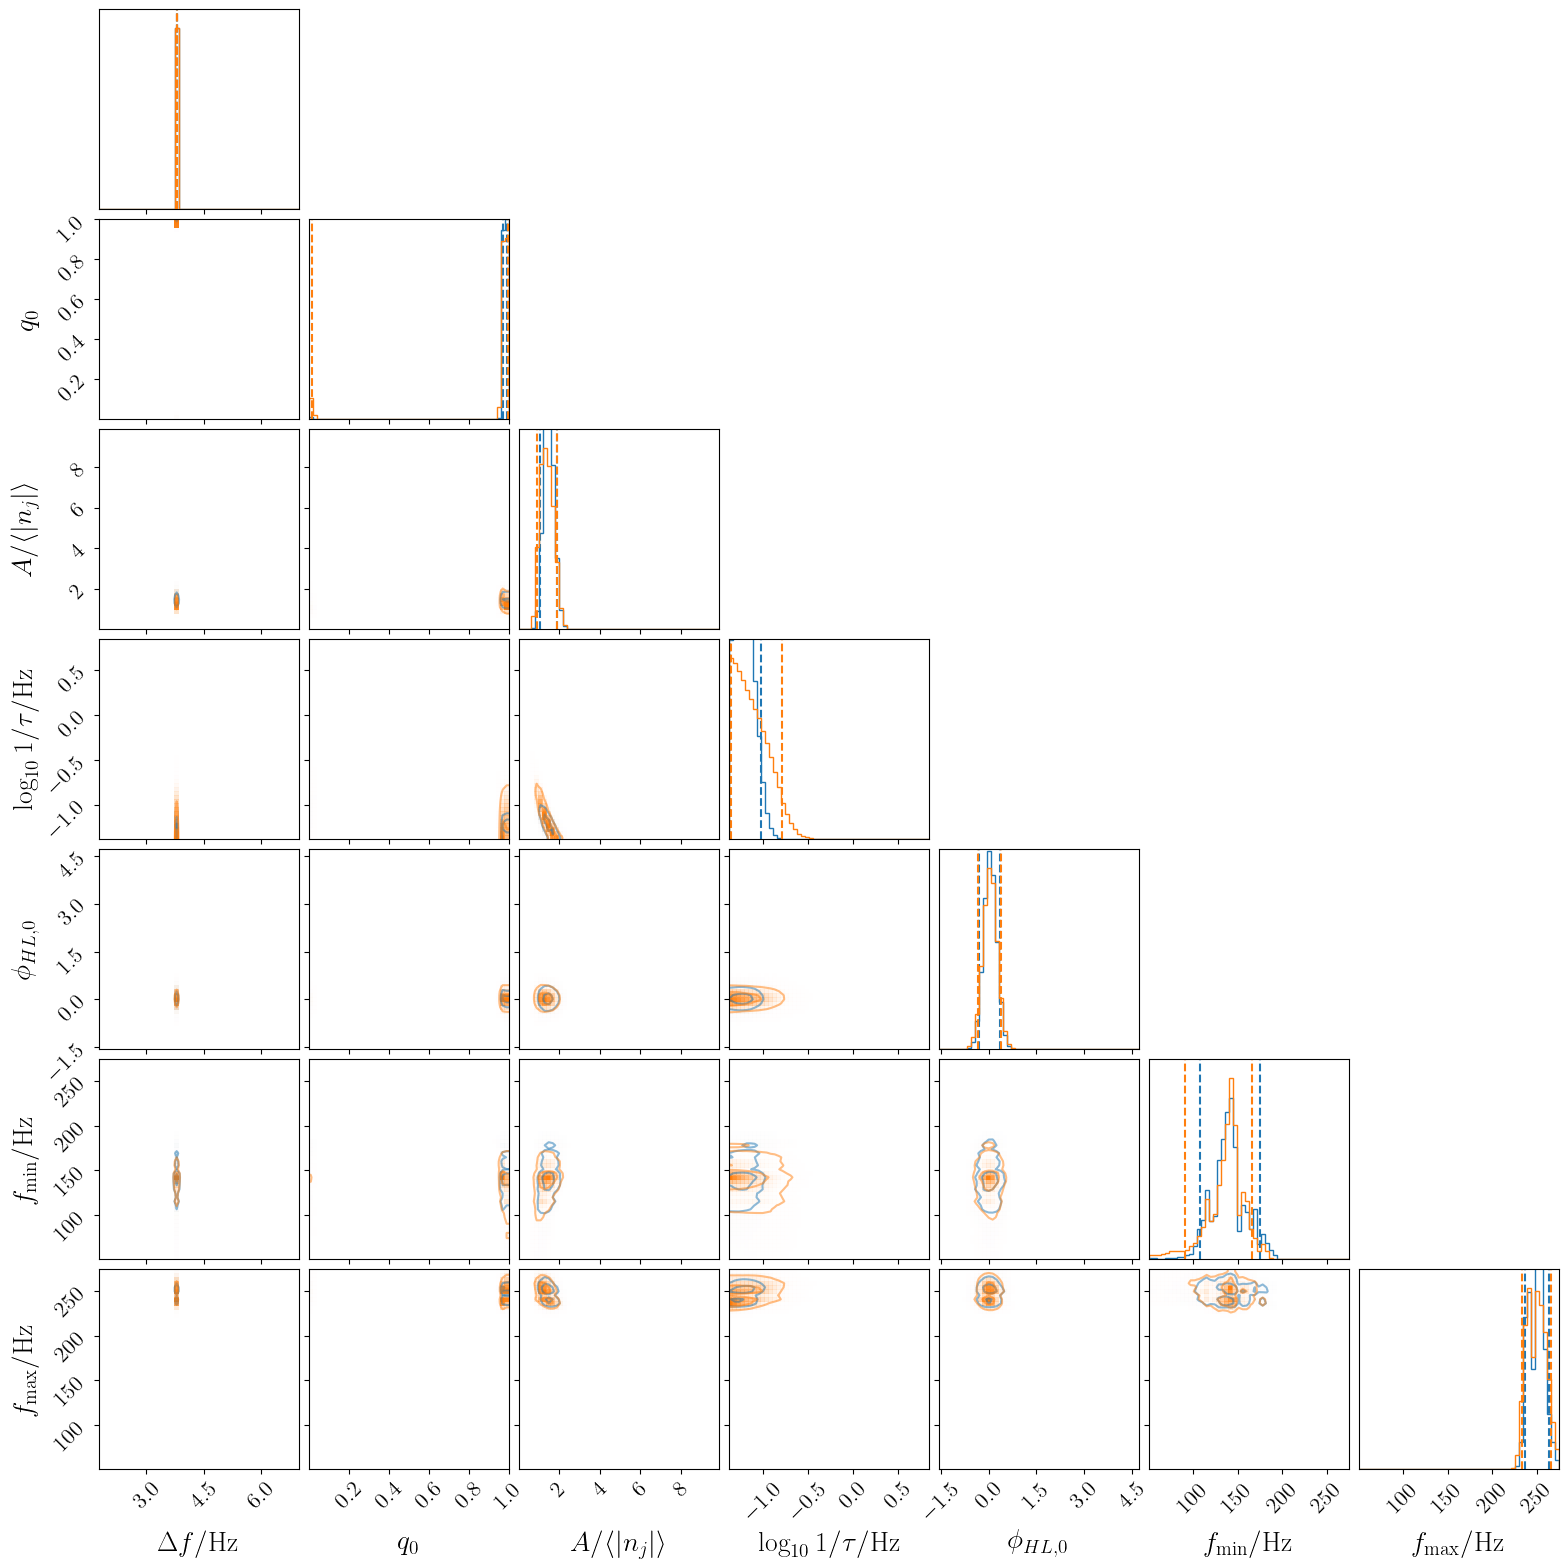

log_likelihood 39.90455034304654 16.079011881327986 12.704407426650938
spacing 3.8120388884709486 0.0007541702968212327 0.0007836725505949715
width -1.217536656432956 0.19778163182318864 0.14789782119971995
phase 0.9802411515772551 0.010473265897306017 0.010784017902419007
amplitude 1.457122031870691 0.4462225993682938 0.38925966406194723
fmin 138.6437652233249 36.192437840484104 30.885696758288432
fmax 249.77768000115393 14.074191833758476 13.513302980341052
res_phase0 0.02609388998486395 0.33828890300925585 0.33090224103428795
SNR 13.770746556870623 2.1432121089612703 2.2253869967013564
log_likelihood 24.632062495745707 13.999800679645212 10.737610752809912
spacing 3.812014098875461 0.0012960043073837468 0.0016543771266221974
width -1.1528781187813408 0.36244158253243897 0.21149828860150244
phase 0.978834461009938 0.015752401008462535 0.9614008838058533
amplitude 1.3542006722299909 0.5636228841769426 0.45951271283360695
fmin 139.23131429371722 26.79533059035768 48.237964919702705
fma

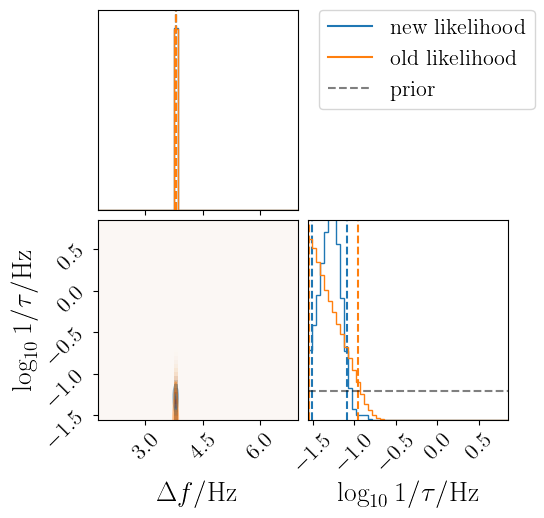

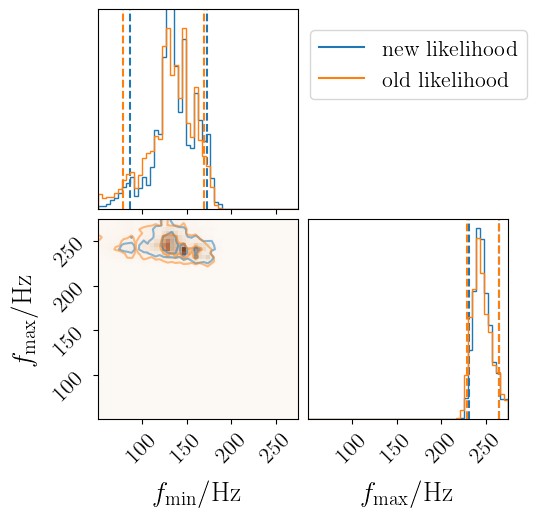

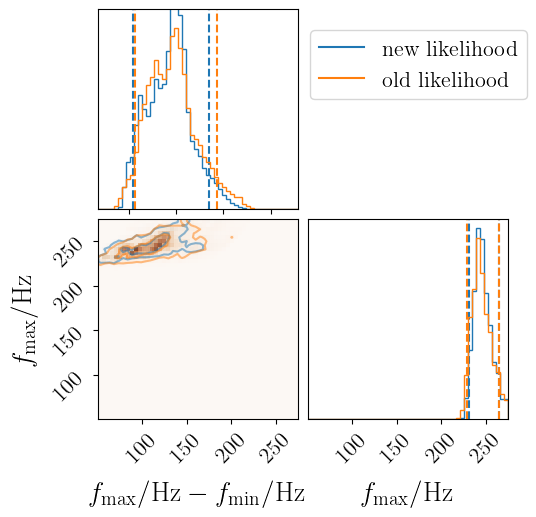

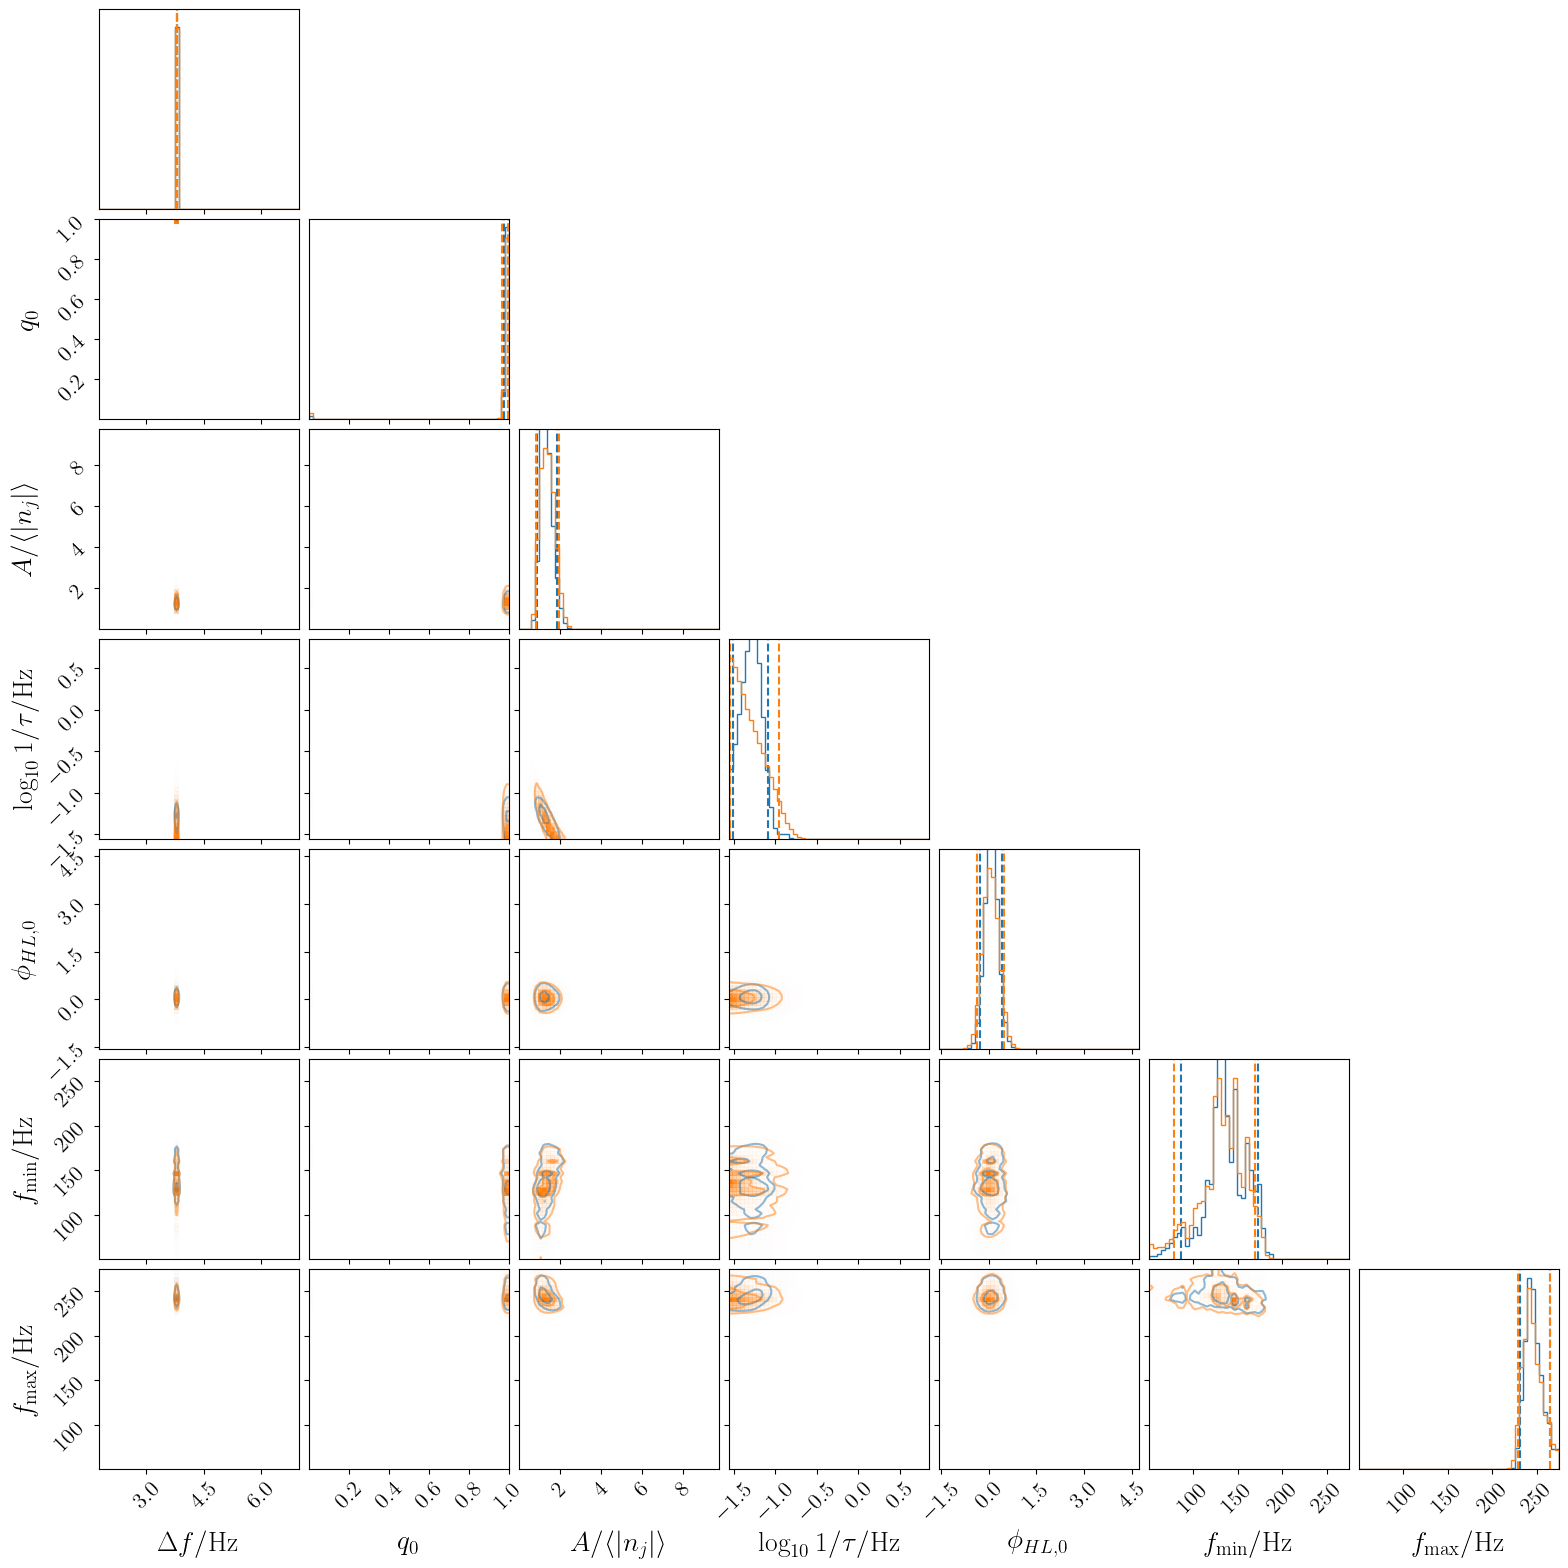

log_likelihood 38.58597002739819 17.722939571435624 15.901324565328892
spacing 3.8118841136263204 0.0006398238980129811 0.000671432640444003
width -1.2970277155919296 0.20500839277317828 0.21472221944158054
phase 0.9858524138327183 0.008312667335664381 0.00917881971868495
amplitude 1.2985400668390972 0.5779232140448183 0.3729616339233144
fmin 134.0413819564159 38.47870068011582 48.14792944701598
fmax 244.7034292292783 19.965244758431083 13.483823366487343
res_phase0 0.06684324135689501 0.35154781485370895 0.34971283148762566
SNR 13.707388393429651 2.2332112438379195 2.3202491114379935
log_likelihood 23.1417508177988 18.452158556233314 13.37440422114224
spacing 3.8118257371725157 0.0008957170232504197 0.0008330919215233656
width -1.3389614956028417 0.3863317186221831 0.20361730542096623
phase 0.9864064206523919 0.009840835269459225 0.017976980310755453
amplitude 1.3707902640473468 0.612755832257901 0.49419395130218924
fmin 133.17212391692055 35.94695313334657 54.82655182351557
fmax 243.

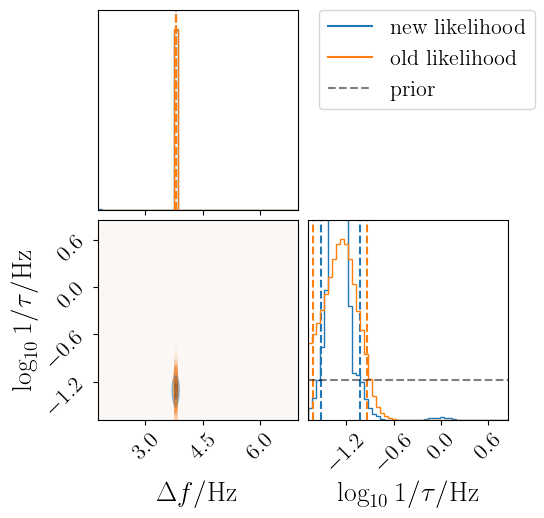

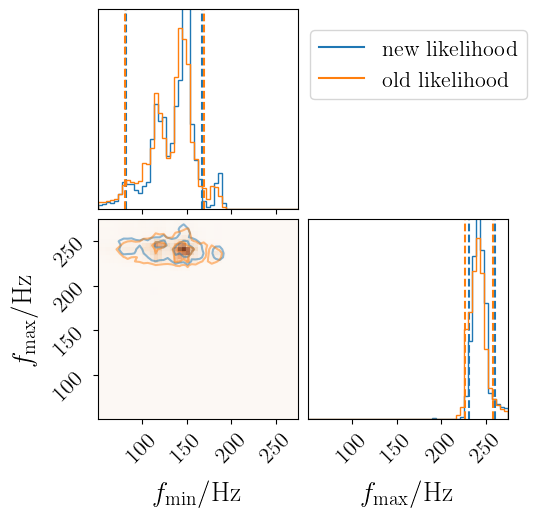

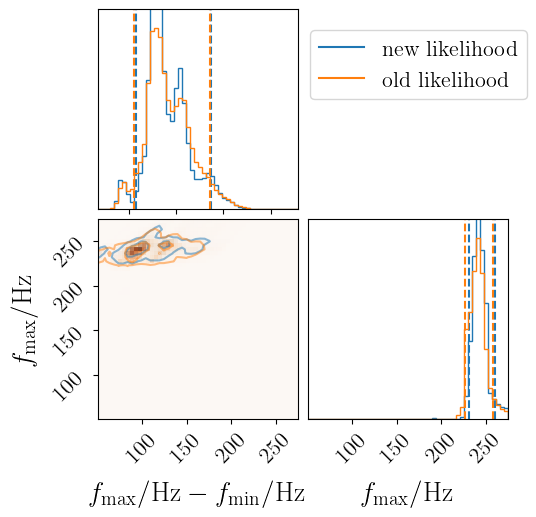

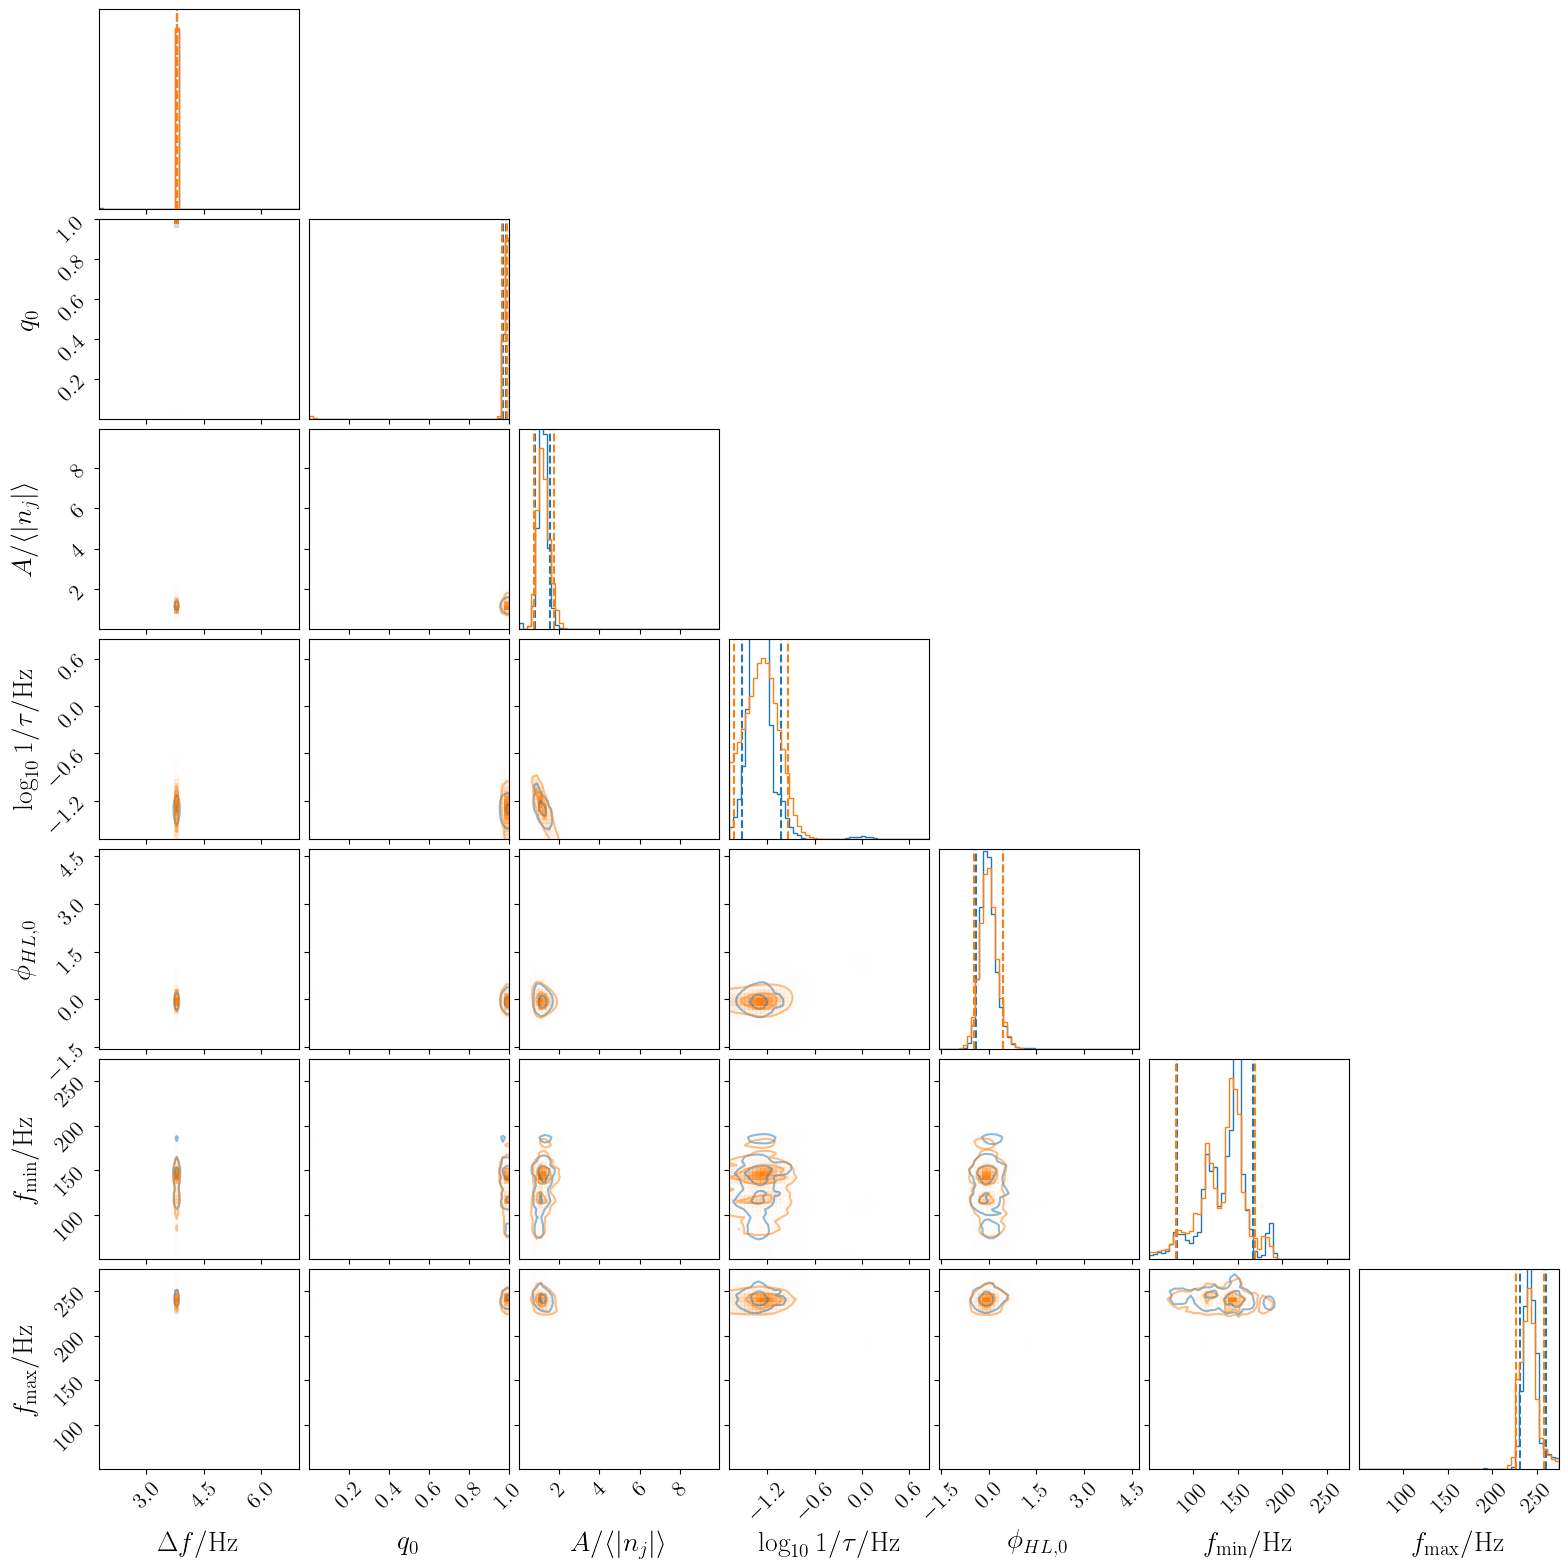

log_likelihood 40.88543952623415 25.568961621367478 19.66510355312003
spacing 3.81193953937515 0.000622234099442398 0.0005848979334235338
width -1.3022033718117396 0.2836856653761455 0.21200296169773436
phase 0.9818666790862305 0.0071726142418074845 0.009117254794095087
amplitude 1.1786659435836973 0.39059154738772195 0.3796549931495724
fmin 140.23414224147348 27.363892279412994 57.969545545869494
fmax 242.04524414636774 18.076698438889878 10.447845868116985
res_phase0 -0.04581046849758097 0.5041224871098149 0.3559655411372557
SNR 13.88578116641235 2.3513243911813184 2.561370159385257
log_likelihood 23.50143546604318 15.652311948914818 14.576415118602407
spacing 3.8118509218497127 0.0009747316666048889 0.000787939353739997
width -1.2764346271945841 0.3439743684090082 0.3455599141966874
phase 0.9827836536091017 0.008961417225343493 0.015678337782086493
amplitude 1.1849108014311256 0.5796382680952581 0.40015716907268006
fmin 137.87155203462765 31.95072919655442 56.68145182310987
fmax 240

In [7]:
for file_array_new_2,file_array_old_2 in zip(file_array_new_2d,file_array_old_2d):
    print(len(file_array_new_2),len(file_array_old_2))
    priors = bilby.result.read_in_result(file_array_new_2[0]).priors
    posterior_array_new = [bilby.result.read_in_result(result_single).posterior for result_single in file_array_new_2]
    posterior_array_old = [bilby.result.read_in_result(result_single).posterior for result_single in file_array_old_2]
    posterior_array_allplus_new = pd.concat(posterior_array_new,ignore_index=True)
    posterior_array_allplus_old = pd.concat(posterior_array_old,ignore_index=True)
    # priors = bilby.result.read_in_result(file_array_new_2[0]).priors
    amplitude_normalize_factors = np.mean([bilby.result.read_in_result(result_single).priors['amplitude'].minimum for result_single in file_array_new_2]) * 100

    duration_str = file_array_new_2[0].split("/")[2].split("duration=")[1].split('_')[0]
    print("duration = "+duration_str)

    line1 = mlines.Line2D([], [], color='C0', label='new likelihood')
    line2 = mlines.Line2D([], [], color='C1', label='old likelihood')
    #line3 = mlines.Line2D([], [], color='gray', label='injected value')
    line4 = mlines.Line2D([], [], ls = '--',color='black', alpha = 0.5,label='prior')

    datanew = np.transpose([posterior_array_allplus_new.spacing.values,np.log10(posterior_array_allplus_new.width.values)])
    dataold = np.transpose([posterior_array_allplus_old.spacing.values,np.log10(posterior_array_allplus_old.width.values)])
    kwargsnew = dict(labels=[r"$\Delta f/\mathrm{Hz}$",r"$\log_{10}{1/\tau /\mathrm{Hz}}$"], range=[[priors['spacing'].minimum,priors['spacing'].maximum],[np.log10(priors['width'].minimum),np.log10(priors['width'].maximum)]],show_titles=False, levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),hist_kwargs=dict(density=True),hist2d_kwargs=dict(plot_density=True),contour_kwargs=dict(alpha =0.5),label_kwargs=dict(fontsize=20),color='C0',quantiles=[0.05, 0.95],plot_datapoints=False, fill_contours=False,plot_contours=True,bins = 50)
    kwargsold = dict(labels=[r"$\Delta f/\mathrm{Hz}$",r"$\log_{10}{1/\tau /\mathrm{Hz}}$"], range=[[priors['spacing'].minimum,priors['spacing'].maximum],[np.log10(priors['width'].minimum),np.log10(priors['width'].maximum)]],
                     show_titles=False, levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),hist_kwargs=dict(density=True),
                     hist2d_kwargs=dict(plot_density=True),contour_kwargs=dict(alpha =0.5),label_kwargs=dict(fontsize=20),
                     color='C1',quantiles=[0.05, 0.95],plot_datapoints=False, fill_contours=False,plot_contours=True,bins = 50)

    figure = corner.corner(datanew,**kwargsnew)
    corner.corner(dataold,**kwargsold,fig = figure)
    axes = np.array(figure.axes).reshape((2, 2))
    ax = axes[1,1]
    logprior = 1/(np.log10(priors['width'].maximum/priors['width'].minimum))
    ax.plot(np.log10(np.linspace(priors['width'].minimum, priors['width'].maximum, 1000)),np.linspace(logprior,logprior, 1000),color = 'black',ls='--',alpha = 0.5,label = 'prior')
    ax = axes[1,0]
    ax.hist2d(posterior_array_allplus_new.spacing.values,np.log10(posterior_array_allplus_new.width.values),bins=50,density=True,cmap='Blues',range=[[priors['spacing'].minimum,priors['spacing'].maximum],[np.log10(priors['width'].minimum),np.log10(priors['width'].maximum)]])
    ax.hist2d(posterior_array_allplus_old.spacing.values,np.log10(posterior_array_allplus_old.width.values),bins=50,density=True,cmap='Oranges',alpha = 0.5,range=[[priors['spacing'].minimum,priors['spacing'].maximum],[np.log10(priors['width'].minimum),np.log10(priors['width'].maximum)]])
    ax.ticklabel_format(axis="x", style="sci", scilimits=(0, 0),useMathText=True)
    ax = axes[1,1]
    plt.legend(handles=[line1,line2,line4], bbox_to_anchor=(0., 1.5, 1., .0),loc=0,fontsize=16)
    plt.savefig("duration = "+duration_str+"SpacingWidth_corner.pdf",dpi = 300)
    plt.savefig("duration = "+duration_str+"SpacingWidth_corner_cut.pdf",dpi = 300,bbox_inches=Bbox([[0.1,0.1],[3.05,3.03]]))
    plt.show()
    plt.close()



    datanew = np.transpose([posterior_array_allplus_new.fmin.values,posterior_array_allplus_new.fmax.values])
    dataold = np.transpose([posterior_array_allplus_old.fmin.values,posterior_array_allplus_old.fmax.values])
    kwargsnew = dict(labels=[r"$f_{\mathrm{min}}/\mathrm{Hz}$",r"$f_{\mathrm{max}}/\mathrm{Hz}$"], range=[[priors['fmin'].minimum,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]],show_titles=False, levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),hist_kwargs=dict(density=True),hist2d_kwargs=dict(plot_density=True),contour_kwargs=dict(alpha =0.5),label_kwargs=dict(fontsize=20),color='C0',quantiles=[0.05, 0.95],plot_datapoints=False, fill_contours=False,plot_contours=True,bins = 50)
    kwargsold = dict(labels=[r"$f_{\mathrm{min}}/\mathrm{Hz}$",r"$f_{\mathrm{max}}/\mathrm{Hz}$"], range=[[priors['fmin'].minimum,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]],show_titles=False, levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),hist_kwargs=dict(density=True),hist2d_kwargs=dict(plot_density=True),contour_kwargs=dict(alpha =0.5),label_kwargs=dict(fontsize=20),color='C1',quantiles=[0.05, 0.95],plot_datapoints=False, fill_contours=False,plot_contours=True,bins = 50)
    figure = corner.corner(datanew,**kwargsnew)
    corner.corner(dataold,**kwargsold,fig = figure)
    axes = np.array(figure.axes).reshape((2, 2))
    ax = axes[1,0]
    ax.hist2d(posterior_array_allplus_new.fmin.values,posterior_array_allplus_new.fmax.values,bins=50,density=True,cmap='Blues',range=[[priors['fmin'].minimum,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]],alpha =0.5)
    ax.hist2d(posterior_array_allplus_old.fmin.values,posterior_array_allplus_old.fmax.values,bins=50,density=True,cmap='Oranges',alpha = 0.5,range=[[priors['fmin'].minimum,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]])
    ax = axes[1,1]
    plt.legend(handles=[line1,line2], bbox_to_anchor=(0.15, 2.0, 1., .0),loc=0,fontsize=16)
    plt.savefig("duration = "+duration_str+"FRange_corner.pdf",dpi = 300)
    plt.savefig("duration = "+duration_str+"FRange_corner_cut.pdf",dpi = 300,bbox_inches=Bbox([[0.1,0.1],[3.05,3.03]]))
    plt.show()
    plt.close()



    datanew = np.transpose([posterior_array_allplus_new.fmax.values-posterior_array_allplus_new.fmin.values,posterior_array_allplus_new.fmax.values])
    dataold = np.transpose([posterior_array_allplus_old.fmax.values-posterior_array_allplus_old.fmin.values,posterior_array_allplus_old.fmax.values])
    kwargsnew = dict(labels=[r"$f_{\mathrm{max}}/\mathrm{Hz}-f_{\mathrm{min}}/\mathrm{Hz}$",r"$f_{\mathrm{max}}/\mathrm{Hz}$"], range=[[20,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]],show_titles=False, levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),hist_kwargs=dict(density=True),hist2d_kwargs=dict(plot_density=True),contour_kwargs=dict(alpha =0.5),label_kwargs=dict(fontsize=20),color='C0',quantiles=[0.05, 0.95],plot_datapoints=False, fill_contours=False,plot_contours=True,bins = 50)
    kwargsold = dict(labels=[r"$f_{\mathrm{max}}/\mathrm{Hz}-f_{\mathrm{min}}/\mathrm{Hz}$",r"$f_{\mathrm{max}}/\mathrm{Hz}$"], range=[[20,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]],show_titles=False, levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),hist_kwargs=dict(density=True),hist2d_kwargs=dict(plot_density=True),contour_kwargs=dict(alpha =0.5),label_kwargs=dict(fontsize=20),color='C1',quantiles=[0.05, 0.95],plot_datapoints=False, fill_contours=False,plot_contours=True,bins = 50)
    def get_normalisation_weight(len_current_samples, len_of_longest_samples):
        return np.ones(len_current_samples) * (len_of_longest_samples / len_current_samples)
    figure = corner.corner(datanew,**kwargsnew)
    corner.corner(dataold,**kwargsold,fig = figure)
    axes = np.array(figure.axes).reshape((2, 2))
    ax = axes[1,0]
    ax.hist2d(posterior_array_allplus_new.fmax.values-posterior_array_allplus_new.fmin.values,posterior_array_allplus_new.fmax.values,bins=50,density=True,cmap='Blues',range=[[priors['fmin'].minimum,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]],alpha =0.5)
    ax.hist2d(posterior_array_allplus_old.fmax.values-posterior_array_allplus_old.fmin.values,posterior_array_allplus_old.fmax.values,bins=50,density=True,cmap='Oranges',alpha = 0.5,range=[[priors['fmin'].minimum,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]])
    ax = axes[1,1]
    plt.legend(handles=[line1,line2], bbox_to_anchor=(0.15, 2.0, 1., .0),loc=0,fontsize=16)
    plt.savefig("duration = "+duration_str+"FRange_corner_new.pdf",dpi = 300)
    # plt.savefig("duration = "+duration_str+"FRange_corner_new_cut.pdf",dpi = 300,bbox_inches=Bbox([[0.1,0.1],[3.05,3.03]]))
    plt.show()
    plt.close()


    kwargsnew = dict(show_titles=False, levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),hist_kwargs=dict(density=True),hist2d_kwargs=dict(plot_density=True),contour_kwargs=dict(alpha =0.5),label_kwargs=dict(fontsize=20),color='C0',quantiles=[0.05, 0.95],plot_datapoints=False, fill_contours=False,plot_contours=True,bins = 50)
    kwargsold = dict(show_titles=False, levels=(1 - np.exp(-0.5), 1 - np.exp(-2)),hist_kwargs=dict(density=True),hist2d_kwargs=dict(plot_density=True),contour_kwargs=dict(alpha =0.5),label_kwargs=dict(fontsize=20),color='C1',quantiles=[0.05, 0.95],plot_datapoints=False, fill_contours=False,plot_contours=True,bins = 50)

    kwargsnew['labels'] = [r"$\Delta f/\mathrm{Hz}$",r"$q_0$",r"$A/\langle |n_j|\rangle$",r"$\log_{10}{1/\tau /\mathrm{Hz}}$",r"$\phi_{HL,0}$",r"$f_{\mathrm{min}}/\mathrm{Hz}$",r"$f_{\mathrm{max}}/\mathrm{Hz}$"]
    kwargsold['labels'] = [r"$\Delta f/\mathrm{Hz}$",r"$q_0$",r"$A/\langle |n_j|\rangle$",r"$\log_{10}{1/\tau /\mathrm{Hz}}$",r"$\phi_{HL,0}$",r"$f_{\mathrm{min}}/\mathrm{Hz}$",r"$f_{\mathrm{max}}/\mathrm{Hz}$"]

    kwargsnew['range'] = [[priors['spacing'].minimum,priors['spacing'].maximum],[priors['phase'].minimum,priors['phase'].maximum],[priors['amplitude'].minimum/amplitude_normalize_factors,priors['amplitude'].maximum/amplitude_normalize_factors],[np.log10(priors['width'].minimum),np.log10(priors['width'].maximum)],[priors['res_phase0'].minimum,priors['res_phase0'].maximum],[priors['fmin'].minimum,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]]
    kwargsold['range'] = [[priors['spacing'].minimum,priors['spacing'].maximum],[priors['phase'].minimum,priors['phase'].maximum],[priors['amplitude'].minimum/amplitude_normalize_factors,priors['amplitude'].maximum/amplitude_normalize_factors],[np.log10(priors['width'].minimum),np.log10(priors['width'].maximum)],[priors['res_phase0'].minimum,priors['res_phase0'].maximum],[priors['fmin'].minimum,priors['fmin'].maximum],[priors['fmax'].minimum,priors['fmax'].maximum]]

    datanew = np.transpose([posterior_array_allplus_new.spacing.values,posterior_array_allplus_new.phase.values,posterior_array_allplus_new.amplitude.values/amplitude_normalize_factors,np.log10(posterior_array_allplus_new.width.values),posterior_array_allplus_new.res_phase0.values,posterior_array_allplus_new.fmin.values,posterior_array_allplus_new.fmax.values])
    dataold = np.transpose([posterior_array_allplus_old.spacing.values,posterior_array_allplus_old.phase.values,posterior_array_allplus_old.amplitude.values/amplitude_normalize_factors,np.log10(posterior_array_allplus_old.width.values),posterior_array_allplus_old.res_phase0.values,posterior_array_allplus_old.fmin.values,posterior_array_allplus_old.fmax.values])

    figure = corner.corner(datanew,**kwargsnew)
    corner.corner(dataold,**kwargsold,fig = figure)
    plt.savefig("duration = "+duration_str+"Full_corner.pdf",dpi = 300)
    plt.show()
    plt.close()


    file_logB_new=glob('outdir_inject_GW150914noise_version3.5_psd0.5_rwalk/*duration=%s_newlikelihood*.csv'%duration_str)[0]
    log_b_new = pd.read_csv(file_logB_new)['logB']
    file_logB_old=glob('outdir_inject_GW150914noise_version3.5_psd0.5_rwalk/*duration=%s_oldlikelihood*.csv'%duration_str)[0]
    log_b_old = pd.read_csv(file_logB_old)['logB']

    rows_new = []
    rows_new.append("duration = "+duration_str+'new')
    format_string_new = '& '+str(int(duration_str))+'s & '
    for keys in keys_all:
        median = np.median(posterior_array_allplus_new[keys])
        lowerlimit = np.percentile(posterior_array_allplus_new[keys], 5)
        upperlimit = np.percentile(posterior_array_allplus_new[keys], 95)
        if keys == 'width':
            median = np.median(np.log10(posterior_array_allplus_new[keys]))
            lowerlimit = np.percentile(np.log10(posterior_array_allplus_new[keys]), 5)
            upperlimit = np.percentile(np.log10(posterior_array_allplus_new[keys]), 95)
        if keys == 'amplitude':
            median = np.median(posterior_array_allplus_new[keys])/amplitude_normalize_factors
            lowerlimit = np.percentile(posterior_array_allplus_new[keys], 5)/amplitude_normalize_factors
            upperlimit = np.percentile(posterior_array_allplus_new[keys], 95)/amplitude_normalize_factors
        if keys == 'log_likelihood':
            median = np.median(log_b_new)
            lowerlimit = np.percentile(log_b_new, 5)
            upperlimit = np.percentile(log_b_new, 95)
        rows_new.append(median)
        rows_new.append(upperlimit-median)
        rows_new.append(median-lowerlimit)
        print(keys, median, upperlimit-median,median-lowerlimit)
        if keys in ['log_likelihood','spacing', 'phase', 'amplitude','width',  'fmin', 'fmax','res_phase0',"SNR"]:
            format_string_new = format_string_new + '$'+format_number(median, upperlimit-median,median-lowerlimit)+ '$'+' & '
    format_string_new = format_string_new[0:-2]+'\\\\'

    rows_old = []
    rows_old.append("duration = "+duration_str+'old')
    format_string_old = '& '+str(int(duration_str))+'s & '
    for keys in keys_all:
        median = np.median(posterior_array_allplus_old[keys])
        lowerlimit = np.percentile(posterior_array_allplus_old[keys], 5)
        upperlimit = np.percentile(posterior_array_allplus_old[keys], 95)
        if keys == 'width':
            median = np.median(np.log10(posterior_array_allplus_old[keys]))
            lowerlimit = np.percentile(np.log10(posterior_array_allplus_old[keys]), 5)
            upperlimit = np.percentile(np.log10(posterior_array_allplus_old[keys]), 95)
        if keys == 'amplitude':
            median = np.median(posterior_array_allplus_old[keys])/amplitude_normalize_factors
            lowerlimit = np.percentile(posterior_array_allplus_old[keys], 5)/amplitude_normalize_factors
            upperlimit = np.percentile(posterior_array_allplus_old[keys], 95)/amplitude_normalize_factors
        if keys == 'log_likelihood':
            median = np.median(log_b_old)
            lowerlimit = np.percentile(log_b_old, 5)
            upperlimit = np.percentile(log_b_old, 95)
        rows_old.append(median)
        rows_old.append(upperlimit-median)
        rows_old.append(median-lowerlimit)
        print(keys, median, upperlimit-median,median-lowerlimit)
        if keys in ['log_likelihood','spacing', 'phase', 'amplitude','width',  'fmin', 'fmax','res_phase0',"SNR"]:
            format_string_old = format_string_old + '$'+format_number(median, upperlimit-median,median-lowerlimit)+ '$'+' & '
    format_string_old = format_string_old[0:-2]+'\\\\'
    # with open('figs/'+'PE.csv', 'w') as f:
    #     f_csv = csv.writer(f)
    #     f_csv.writerow(headers)
    print(format_string_new)
    print(format_string_old)
    with open('PE.csv', 'a+') as f:
        f_csv = csv.writer(f)
        f_csv.writerow(rows_new)
        f_csv.writerow(rows_old)